Supervised learning - involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data.

- classification - the labels are discrete categories

- regression - the labels are continuous quantities (e.g Linear Regression, SupportVector Machines, random forrest regression - Decision Trees and Random Forests)

Unsupervised learning  - involves modeling the features of a dataset without reference to any label, and is often described as “letting the dataset speak for itself.”

- clustering - algorithms identify distinct groups of data (e.g. k-Means Clustering, Gaussian Mixture Models)

- dimensionality reduction - algorithms search for more succinct representations of the data (e.g. Principal Component Analysis, 
Manifold Learning)

-------------------------------------------------------------------------------------------------------------------------------
Supervised learning -  Models that can predict labels based on labeled training data
- Classification:  Models that predict labels as two or more discrete categories
- Regression: Models that predict continuous labels


Unsupervised learning - Models that identify structure in unlabeled data
- Clustering: Models that detect and identify distinct groups in the data
- Dimensionality reduction: Models that detect and identify lower-dimensional structure in higherdimensional data

--------------------------------------------------------------------------------------------------------------------------------

Semi-supervised learning methods, which fall somewhere between supervised learning and unsupervised learning. Semi-supervised
learning methods are often useful when only incomplete labels are available.


X = features = independent variables

y = label = target = dependent variable

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:

    • For supervised learning, often we predict labels for unknown data using the
    predict() method.

    • For unsupervised learning, we often transform or infer properties of the data
    using the transform() or predict() method.

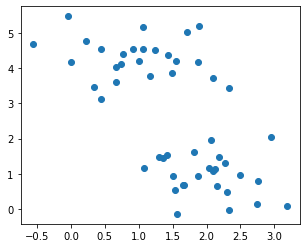

In [18]:
#********************************************* CLASSIFICATION

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


X, y= make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
len(X)

fig, ax = plt.subplots(figsize=(5, 4))
ax.scatter(X[:, 0], X[:, 1])

In [21]:
#****************************************** SCIKIT-LEARN
import seaborn as sns

iris=sns.load_dataset('iris')
iris.head()

# the rows of the matrix as samples, and the number of rows as n_samples
# he columns of the matrix as features, and the number of columns as n_features

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


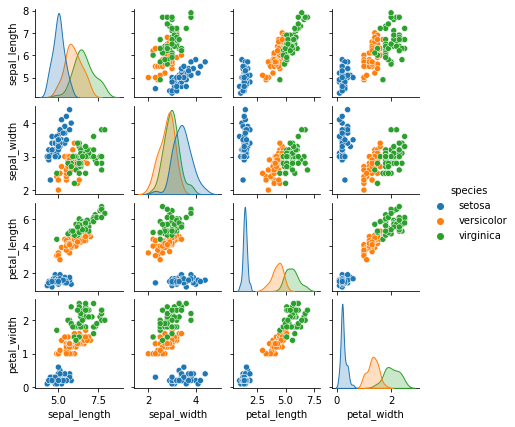

In [24]:
sns.pairplot(iris, hue='species', height=1.5)

In [29]:
X= iris.drop('species', axis=1)
y=iris.species

print(X.shape)
print(y.shape)

(150, 4)
(150,)


(-2.0, 25.0)

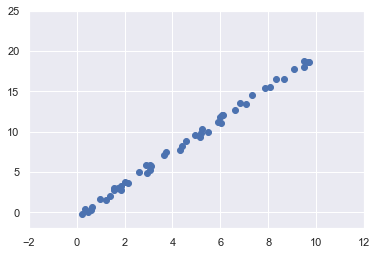

In [65]:
# ******************************************* SIMPLE LINEAR REGRESSION
import matplotlib.pyplot as plt
import numpy as np
sns.set()

rng=np.random.RandomState(42)
x=rng.rand(50) * 10 # (50 float elements between 0-1) * 10 each = 50 float elements between 0-10
y= 2* x - 1 + rng.rand(50) 

plt.scatter(x, y)
plt.xlim(-2,12)
plt.ylim(-2, 25)

In [43]:
# 1) CHOOSE MODEL:

from sklearn.linear_model import LinearRegression
LR=LinearRegression(fit_intercept=True)
LR

LinearRegression()

2) Choose model hyperparameters.
An important point is that a class of model is not the same as an instance of a model.
Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

• Would we like to fit for the offset (i.e., intercept)?

• Would we like the model to be normalized?

• Would we like to preprocess our features to add model flexibility?

• What degree of regularization would we like to use in our model?

• How many model components would we like to use?


In [50]:
# 3) Arrange data into a features matrix and target vector:
x.ndim # 1 dimension
X= x[:, np.newaxis]
X.ndim # 2 dimensions (50 rows, 1 column)


# 4) Train model:

model=LR.fit(X, y)
model

LinearRegression()

In [64]:
# In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores:

# f(x)= ax + b

a= model.coef_
b= model.intercept_
print(a)
print(b)

# f(x)= 2.00660766 * x - 0.5350275750800026

[2.00660766]
-0.5350275750800026


In [62]:
# 5) Predict labels for unknown data:
xtest=np.linspace(-1,11)
Xtest=xtest[:, np.newaxis]

predictions=model.predict(Xtest)
predictions


array([-2.54163524, -2.05022112, -1.558807  , -1.06739287, -0.57597875,
       -0.08456463,  0.40684949,  0.89826361,  1.38967774,  1.88109186,
        2.37250598,  2.8639201 ,  3.35533422,  3.84674835,  4.33816247,
        4.82957659,  5.32099071,  5.81240483,  6.30381896,  6.79523308,
        7.2866472 ,  7.77806132,  8.26947544,  8.76088957,  9.25230369,
        9.74371781, 10.23513193, 10.72654605, 11.21796018, 11.7093743 ,
       12.20078842, 12.69220254, 13.18361666, 13.67503079, 14.16644491,
       14.65785903, 15.14927315, 15.64068727, 16.1321014 , 16.62351552,
       17.11492964, 17.60634376, 18.09775788, 18.58917201, 19.08058613,
       19.57200025, 20.06341437, 20.5548285 , 21.04624262, 21.53765674])

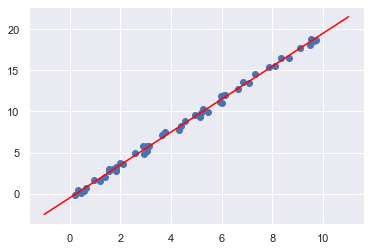

In [66]:
plt.scatter(x,y)
plt.plot(xtest, predictions, color='red')

In [97]:
#************************************SUPERVISED LEARNING - CLASSIFICATION - GAUSSIAN NAIVE BAYES (no hyperparameters to choose)
from sklearn.model_selection import train_test_split
# or from sklearn.cross_validation import train_test_split

iris=sns.load_dataset('iris')
iris.head()
X=iris.drop('species', axis=1).values
y=iris['species'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [98]:
# Model:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(X_train, y_train)
predictions=model.predict(X_test)

predictions

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

In [99]:
# Score model:
from sklearn.metrics import classification_report, accuracy_score

report=classification_report(predictions, y_test)
print(report)
print('Accuracy: ', accuracy_score(predictions, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Accuracy:  0.9736842105263158


In [100]:
col=iris.columns[:4].tolist()
k=np.empty(len(col))
while True:
    for i, j in enumerate(col):
        k[i]=input(f"Please provide {j}: ")
    pred=model.predict([k])
    print(f"For the given conditions the predicted species is: {pred[0]}")
    rep=input('Do you want to continue? If yes, press "Yes": ')
    if rep.lower()!='yes':
        break

Please provide sepal_length: 2
Please provide sepal_width: 1
Please provide petal_length: 5
Please provide petal_width: 4
For the given conditions the predicted species is: virginica
Do you want to continue? If yes, press "Yes"yes
Please provide sepal_length: 5
Please provide sepal_width: 3
Please provide petal_length: 1
Please provide petal_width: 0.2
For the given conditions the predicted species is: setosa
Do you want to continue? If yes, press "Yes"no


In [104]:
#************************************UNSUPERVISED LEARNING - DIMENSIONALITY REDUCTION - PCA()
iris=sns.load_dataset('iris')

X=iris.drop('species', axis=1).values
y=iris['species'].values

# IRIS DATASET IS 4 - DIMENSIONAL ->  EACH SAMPLE HAS 4 FEATURES

The task of dimensionality reduction is to ask whether there is a suitable lowerdimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data; after all, it is much easier to plot data in two dimensions than in four dimensions or higher.

In [105]:
# PCA - is a fast linear dimensionality reduction technique:
from sklearn.decomposition import PCA

model=PCA(n_components=2) # returns 2-dimensional representation of the data
model.fit(X) # only X - unsupervised!
X2d=model.transform(X)
X2d

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [106]:
# add new compressed dimensions to the original dataset:
iris['PCA1']=X2d[:, 0]
iris['PCA2']=X2d[:, 1]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


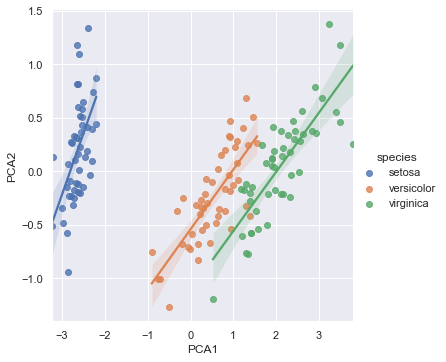

In [109]:
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species')

In [115]:
#********************************UNSUPERVISED LEARNING - CLUSTERING = GMM Gaussian Mixture Model:

# A clustering algorithm attempts to find distinct groups of data without reference to any labels.
# GMM - to model the data as a collection of Gaussian blobs

from sklearn.mixture import GaussianMixture

model=GaussianMixture(n_components=3, covariance_type='full') # 3 clusters
model.fit(X) # only X - unsupervised!
predictions=model.predict(X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [117]:
# add predictions to the original dataset:
iris['GMM']=predictions
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,GMM
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


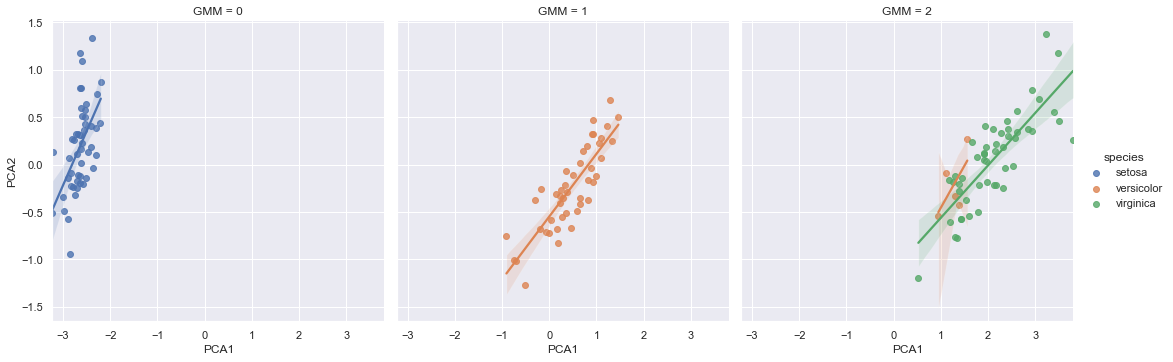

In [118]:
sns.lmplot('PCA1', 'PCA2', data=iris, col='GMM', hue='species')

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the setosa species is separated perfectly within cluster 0, while there remains a small amount of mixing between versicolor and virginica.

In [120]:
#****************************************DIGITS DATA:
from sklearn.datasets import load_digits

digits= load_digits()
digits.images.shape

(1797, 8, 8)

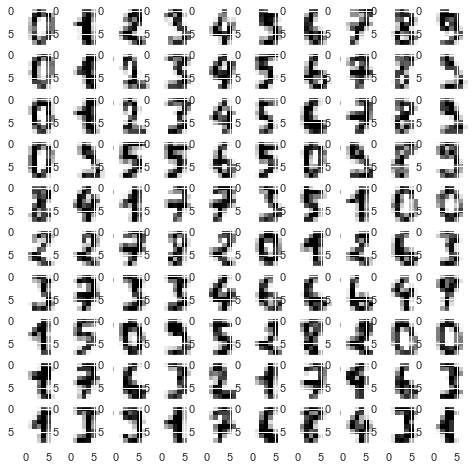

In [131]:
fig, axes = plt.subplots(10, 10, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')


In [145]:
# each pixel in the image is treated as a feature
digits.images.ndim # 3 dimensions - we need to flatten it to 2 dimensions -> [n_samples, n_features] representation

# flattening = length-64 array of pixel values representing each digit - in digits dataset it is already made:

X=digits.data

y=digits.target

print(X.shape) #(1797, 64) -> reduce dimensionality from 64 to 2 using manifold learning algorithm called Isomap
print(y.shape)

(1797, 64)
(1797,)


In [138]:
# isomap algirithm to flatten dimensionality:
from sklearn.manifold import Isomap

iso=Isomap(n_components=2) # converting to 2D
iso.fit(digits.data)

digits2d= iso.transform(digits.data)
digits2d.shape

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:302: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

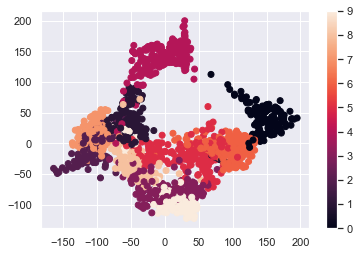

In [144]:
plt.scatter(digits2d[:, 0], digits2d[:, 1], c=digits.target)
plt.colorbar()

# This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space.
# colorbar reflects actual number values, some values overlap - numbers are similar

In [146]:
# MODEL - CLASSIFICATION ALGORITHM:

from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # X.shape= (1797, 64); y.shape=(1797,)

model=GaussianNB()
model.fit(X_train, y_train)
predictions=model.predict(X_test)

In [150]:
from sklearn.metrics import classification_report, accuracy_score


report=classification_report(predictions, y_test)
print(report)
print('Accuracy: ', accuracy_score(predictions, y_test))

# good to check more sophisticated algorithm like Support Vector Machine or Random Forest

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       0.78      0.85      0.82        34
           2       0.61      0.85      0.71        27
           3       0.83      0.97      0.89        39
           4       0.84      0.98      0.90        47
           5       0.95      0.90      0.93        62
           6       0.96      0.90      0.92        48
           7       0.98      0.71      0.82        56
           8       0.89      0.60      0.72        57
           9       0.73      0.90      0.80        39

    accuracy                           0.86       450
   macro avg       0.85      0.87      0.85       450
weighted avg       0.87      0.86      0.85       450

Accuracy:  0.8555555555555555


In [166]:
# CONFUSION MATRIX - to display which exactly values were classified incorrectly (or correctly)

from sklearn.metrics import confusion_matrix

com=confusion_matrix(y_true=y_test, y_pred=predictions)
com

array([[41,  0,  0,  0,  0,  1,  0,  1,  0,  0],
       [ 0, 29,  2,  0,  0,  0,  0,  0,  4,  2],
       [ 0,  2, 23,  0,  0,  0,  1,  0, 12,  0],
       [ 0,  0,  1, 38,  0,  1,  0,  0,  5,  1],
       [ 0,  0,  0,  0, 46,  0,  2,  7,  0,  0],
       [ 0,  0,  0,  0,  0, 56,  1,  1,  0,  1],
       [ 0,  0,  0,  0,  1,  1, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 40,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  2, 34,  0],
       [ 0,  1,  1,  1,  0,  2,  1,  5,  2, 35]], dtype=int64)

Text(89.18, 0.5, 'true value')

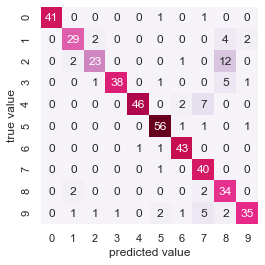

In [163]:
sns.heatmap(com, annot=True, cbar=False, square=True, cmap='PuRd') 
plt.xlabel('predicted value')
plt.ylabel('true value')

In [175]:
# **************************************** MODEL SELECTION AND VALIDATION - HYPERPARAMETERS

# TRAIN/TEST vs CROSS VALIDATION:
# using train/test - the part of the dataset (test set) does not contribute to the training of the model! This is not optimal, 
#and can cause problems— especially if the initial set of training data is small.

# One way to address this is to use cross-validation—that is, to do a sequence of fits where each subset of the data 
# is used both as a training set and as a validation set.


# example - knn clustering on iris data:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris=sns.load_dataset('iris')
iris.head()

X=iris.drop('species', axis=1).values
y=iris['species'].values

# a) train/test;
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)

model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
predictions=model.predict(X_test)

acc_t=accuracy_score(predictions, y_test)
print("Accuracy - train/test: ", acc_t)

# b) cross validation:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5) # cv =5 the whole data will be split on the same 5 subsets - there will be 5 trials,
# in each trial another subset will be used as test set

scores.mean()

print("Accuracy - cross validation: ", scores.mean())

Accuracy - train/test:  0.9066666666666666
Accuracy - cross validation:  0.96


SELECTING THE BEST MODEL:

if our estimator is underperforming, how should we move forward? There are several possible answers:

• Use a more complicated/more flexible model

• Use a less complicated/less flexible model

• Gather more training samples

• Gather more data to add features to each sample

In particular, sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results

UNDERFITTING = HIGH BIAS - model does not have enough model flexibility to suitably account for all the features in the data (e.g. straight line)

OVERFITTING = HIGH VARIANCE - high-order polynomial through the data, model fit has enough flexibility to nearly perfectly account for the fine features in the data

R2 score = coefficient of determination - which measures how well a model performs relative to a simple mean, 
R2 = 1 indicates a perfect match, R2 = 0 indicates the model does no better than simply taking the mean of the data, and negative values mean even worse models


• For high-bias models, the performance of the model on the test set is similar to the performance on the training set.

• For high-variance models, the performance of the model on the test set is far worse than the performance on the training set.



Polynomial Regression;

- degree = 1 STRAIGHT LINE

y= ax+b

- degree > 1  e.g 3 :

y = ax^3 + bx^2 + cx + d


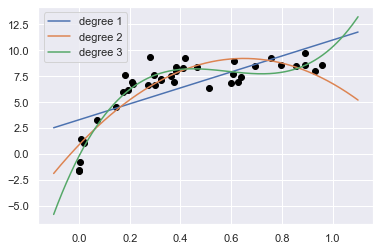

In [214]:
# POLYNOMIAL REGRESSION WITH THE DIFFERENT DEGREES:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# data:
rng=np.random.RandomState(0)
X=rng.rand(40,1) ** 2
X.ndim # =2

# array.ravel() = array.reshape(-1)  -> ndim=1
y=10-1./(X.ravel()+0.1)
y=y + rng.randn(40)

# plot data:
plt.scatter(X.ravel(), y, color='black')

X_test=np.linspace(-0.1, 1.1, 500)[:, np.newaxis] # from 1D to 2D


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

for degree in [1,2,3]:
    model=PolynomialRegression(degree=degree)
    model.fit(X, y)
    predictions=model.predict(X_test) # cannot take 1D array
    plt.plot(X_test.ravel(), predictions, label='degree {}'.format(degree))
    plt.legend()
    

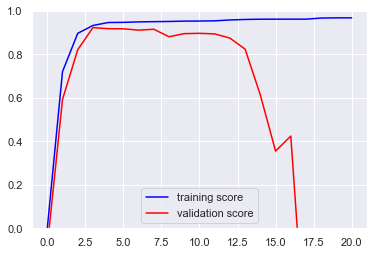

In [233]:
# what degree of polynomial provides a suitable trade-off between bias (underfitting) and variance (overfitting)?

from sklearn.model_selection import validation_curve

degree=np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(degree), X, y, param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.legend()

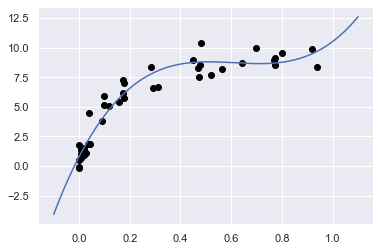

In [235]:
# from the above chart - the optimal degree for Polynomial Regression is 3:

#plot the original data:
plt.scatter(X.ravel(), y, color='black')

model=PolynomialRegression(degree=3)
model.fit(X, y)
predictions=model.predict(X_test)

plt.plot(X_test, predictions)

The behavior of the validation curve has two important inputs: the model complexity and the number of training points.
It is often useful to explore the behavior of the model as a function of the number of training points, which we can do by using increasingly larger subsets of the data to fit our model. 

A plot of the training/validation score with respect to the size of the training set is known as a learning curve.

The general behavior we would expect from a learning curve is this:

• A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.

• A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.

• A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

--------------------------------------------------------------------------------------------------------------------------------
Once you have enough points that a particular model has converged, adding more training data will not help you!
The only way to increase model performance in this case is to use another (often more complex) model.


In [238]:
# Grid search - looking for the optimal model:

from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
                'linearregression__fit_intercept': [True, False],
                'linearregression__normalize': [True, False]}

grid=GridSearchCV(PolynomialRegression(), param_grid, cv=7)

grid.fit(X, y)
grid.best_params_

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be re

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be re

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be re

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be re

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be re

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


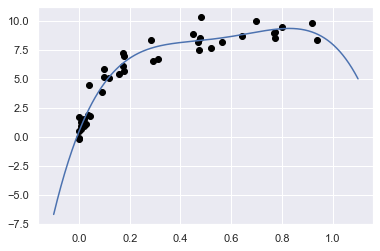

In [239]:
model=grid.best_estimator_

plt.scatter(X.ravel(), y, color='black')

model.fit(X, y)
predictions=model.predict(X_test)
plt.plot(X_test, predictions)

In [267]:
# ****************************************FEATURE ENGINEERING:
# CATEGORICAL FEATURES:

# a ) LABEL ENCODING - encode the text values by putting a running sequence for each text values
# bad point: label encoding induces a new problem since it uses number sequencing. 
# The problem using the number is that they introduce relation/comparison between them.
# useful for the categories where numerical order makes sense e.g. none < low < medium < high

import pandas as pd

data=pd.DataFrame(('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable'), columns=['Bridge_Types'])
# data.info() # current dtype = object

# in python - data column must have data type as 'category'
data['Bridge_Types']=data['Bridge_Types'].astype('category')
data['Bridge_Types_Cat']=data['Bridge_Types'].cat.codes

data.head()

# using Scikit-learn converting data type to 'category' not required:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
data['Bridge_Types_CatSK']=labelencoder.fit_transform(data['Bridge_Types'])
data.head()

# B ) ONE-HOT ENCODING:
# only takes numerical categorical values, hence any value of string type should be label encoded before one hot encoded 
# (columns Bridge_Types_Cat or Bridge_Types_CatSK)

from sklearn.preprocessing import OneHotEncoder

OHE=OneHotEncoder(handle_unknown='ignore', sparse=True)
enc=OHE.fit_transform(data[['Bridge_Types_CatSK']]).toarray()
enc_df=pd.DataFrame(enc)

# combine two DF:
df=data.join(enc_df)
df

# C) GET DUMMIES - is more flexible because it allows encoding as many category columns as you would like 
# and choose how to label the columns using a prefix.

GM_df=pd.get_dummies(df, columns=['Bridge_Types'], prefix='Type: ')
GM_df


,Bridge_Types_Cat,Bridge_Types_CatSK,0,1,2,3,4,5,6,Type: _Arch,Type: _Beam,Type: _Cable,Type: _Cantilever,Type: _Suspension,Type: _Tied Arch,Type: _Truss
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0
1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0
2,6,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
3,3,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0
4,5,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0
5,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,1,0,0
6,2,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0


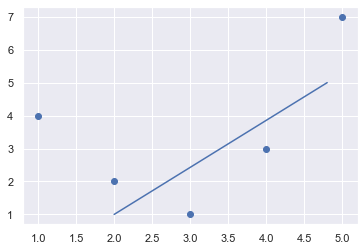

In [283]:
# EXAMPLE - IMPROVING A MODEL NOT BY CHANGING THE MODEL BUT BY TRANSFORMING THE INPUTS: 

from sklearn.linear_model import LinearRegression

rng=np.random.RandomState(42)

# x= rng.randint(0,10,15) # start, end, number of items
# y=rng.randint(0,10,15)

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])

plt.scatter(x,y)

model=LinearRegression()

X=x[:, np.newaxis] # converting features array from 1D to 2D
model.fit(X,y)
predictions=model.predict(X)

plt.plot(predictions, x)

In [285]:
# ransforming the data, adding extra columns of features to drive more flexibility in the model:
from sklearn.preprocessing import PolynomialFeatures

p=PolynomialFeatures(degree=3, include_bias=False)
X2=p.fit_transform(X)
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

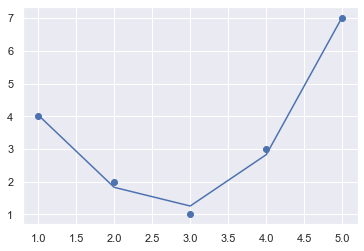

In [286]:
model=LinearRegression()
model.fit(X2,y)
predictions2=model.predict(X2)

plt.scatter(x,y)
plt.plot(x, predictions2)

In [297]:
# ****************************************** HANDLING MISSING VALUES:
# Imputer Class:

X = np.array([[ None, 0, 3 ],
              [ 3, 7, 9 ],
              [ 3, 5, 2 ],
              [ 4, None, 6 ],
              [ 8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])

from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
X2=imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [300]:
#******************************************** PROCESSING PIPELINE - to string together multiple steps:
# EXAMPLE - preparing pipeline with the following steps:
# 1. Impute missing values using the mean
# 2. Transform features to quadratic
# 3. Fit a linear regression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

model=make_pipeline(SimpleImputer(strategy='mean'),
                   PolynomialFeatures(3),
                   LinearRegression())
model.fit(X,y)
predictions=model.predict(X)
predictions

array([14., 16., -1.,  8., -5.])

In [ ]:
#***********************************************ALGORITHMS - OVERVIEW:
# 1) NAIVE BAYES CLASSIFICATION:
# - GAUSSIAN NAIVE BAYES - In this classifier, the assumption is that data from each label is drawn from a simple Gaussian
# distribution (=normal distribution)
